### The Spark Foundation 
#### Task 1 : Predict the percentage of an student based on the number of study hours using Supervised Machine Learning Algorithm (Linear Regression)
#### Author: Emmanuel Mugabo
---
 1. Import the required libraries
 2. Reading in the dataset with pandas
 3. Descriptive statistics of data
 4. Exploratoty and Data Analysis
 5. Model Interpretation and Evaluation
 6. Conclusion
---
1. Import the required libraries

In [1]:
# Import all the required libraries for this task

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
print("The libraries are imported successfuly.")

%matplotlib inline

The libraries are imported successfuly.


2. Load the dataset with pandas
---
We need to read in the dataset into dataframe so that we can work with it easily

In [2]:
# Loading the dataset from the provided link

student_data = pd.read_csv("http://bit.ly/w-data")

We look at the first 5 rows of the dataset to see what our dataset looks like

In [3]:
# Load the first 5 rows of the dataset

student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


3. Descriptive statistics of data
---
##### Data types

It is useful to first understand the data we're dealing with along with the data types of each column. The data types may dictate how we transform and engineer the features.


In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##### Statistics
---
Let's now look at some statistics for our dataset

In [5]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


4. Exploratory Data Analysis (EDA)
---
We now check the irrelevant features in the dataset and remove them

In [6]:
# Check the size of our dataset first
student_data.shape

(25, 2)

In [7]:
# Check if there are any irrelevant feature or missing values to be removed
student_data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# Remove the duplicates if there are any
student_data.drop_duplicates(inplace=True)

In [9]:
# Check if the duplicates are removed
student_data.shape

(25, 2)

From above, we can notice that our original dataset has no duplicates and missixng values.

##### Let's now visualize our dataset point on 2D graph

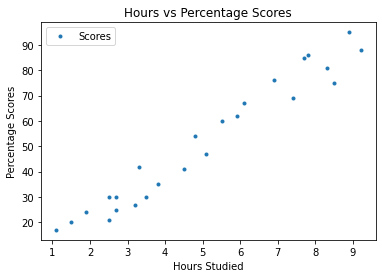

In [10]:
student_data.plot(x = 'Hours', y = 'Scores', style= '.')
plt.title('Hours vs Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

In [11]:
# Check the correlation
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above observations, we can see that the dataset is linear and positive correlated.

5. Model Interpretation
---
   5.1. Splitting the dataset

In [12]:
# Splitting the target variable and feature variable
X = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

In [13]:
X.shape

(25, 1)

In [14]:
y.shape

(25,)

In [15]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size= 0.2, random_state=0)

5.2. Training the model and Prediction

In [16]:
lr_model = LinearRegression() # Defining the model
lr_model.fit(X_train, y_train) # Fit the model to the training dataset

LinearRegression()

In [17]:
# Predicting training and test values
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

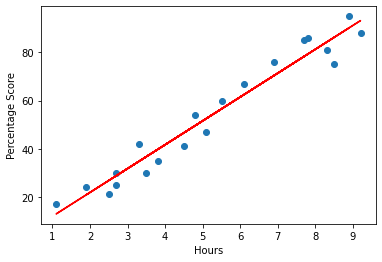

In [18]:
# Plotting the regression line for training set
plt.scatter(X_train, y_train)
plt.plot(X_train, train_pred, color='red')
plt.xlabel('Hours')
plt.ylabel('Percentage Score')
plt.show()

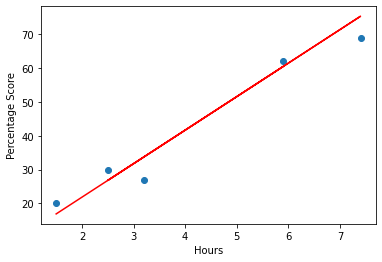

In [19]:
# Plotting for the test dataset
plt.scatter(X_test, y_test)
plt.plot(X_test, test_pred, color='red')
plt.xlabel('Hours')
plt.ylabel('Percentage Score')
plt.show()

After training the model,let's now make the model predictions.

In [20]:
# Testing data in Hours
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Predicting the percentage scores
y_pred = lr_model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [22]:
# DataFrame comparing Actual values to Predicted values
df = pd.DataFrame({'actual': y_test, 'Predicted': y_pred})
df

,actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the model

In [23]:
print(f'Mean Absolute Error:{metrics.mean_absolute_error(y_test,y_pred)}')

Mean Absolute Error:4.183859899002982


#### Answer to the Question

In [24]:
hours = float(input("Enter the no. of study hours to predict the score: "))

Enter the no. of study hours to predict the score: 9.25


In [25]:
print(f"No. of Hours = {hours} ")
print(f"Predicted Score = {lr_model.predict([[hours]])}")

No. of Hours = 9.25 
Predicted Score = [93.69173249]


6. Conclusion
---
In this task, we used Linear Regression Machine learning model to predict the percentage of a student based on the number of study hours. For the question asked if a student studied for 9.25 hrs/day, we saw that the predicted score is ~93.7